In [1]:
import string
import re
import codecs
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
eng_df = pd.read_csv(r"C:\Users\sai\Desktop\file\New folder (2)\English.txt", "utf-8", header=None, names=["English"])

C:\Users\sai\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
ger_df = pd.read_csv(r"C:\Users\sai\Desktop\file\New folder (2)\German.txt", "utf-8", header=None, names=["German"])

C:\Users\sai\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [4]:
eng_df.head(20)

,English
0,Parliament Does Not Support Amendment Freeing ...
1,"Today , the Ukraine parliament dismissed , wit..."
2,The amendment that would lead to freeing the i...
3,"In October , Tymoshenko was sentenced to seven..."
4,The verdict is not yet final; the court will h...
5,Tymoshenko claims the verdict is a political r...
6,The proposal to remove Article 365 from the Co...
7,Its ratification would require 226 votes .
8,Libya &apos;s Victory
9,"The story of Libya &apos;s liberation , or reb..."


# Data Pre-processing

In [5]:
for char in string.punctuation:
    print(chr, end=" ")
translate_table = dict((ord(char), None) for char in string.punctuation)    

<built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> <built-in function chr> 

In [6]:
data_eng=[]
lang_eng=[]
data_ger=[]
lang_ger=[]

In [7]:
for i, line in eng_df.iterrows():
    line = line['English']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_eng.append(line)
        lang_eng.append("English")

In [8]:
for i, line in ger_df.iterrows():
    line = line['German']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_ger.append(line)
        lang_ger.append("German")

In [9]:
df =pd.DataFrame({"Text":data_eng+data_ger,
                 "language":lang_eng+lang_ger})
print(df.shape)

(6000, 2)


In [10]:
df.head()

,Text,language
0,parliament does not support amendment freeing ...,English
1,today the ukraine parliament dismissed withi...,English
2,the amendment that would lead to freeing the i...,English
3,in october tymoshenko was sentenced to seven ...,English
4,the verdict is not yet final the court will he...,English


In [11]:
eng_df.shape

(3000, 1)

In [12]:
ger_df.shape

(3000, 1)

In [13]:
df.tail()

,Text,language
5995,quot wir erwarten ein sehr knappes match sind...,German
5996,quot wir haben weiterhin eine ige chance bei ...,German
5997,das unentschieden am freitag in bosnien zwingt...,German
5998,ein unentschieden kann den bosniern die ebenf...,German
5999,quot das ist ein gutes ergebnis das jedoch ei...,German


# Spliting Language Detection Model

In [14]:
X, y=df.iloc[:,0], df.iloc[:,1]
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=0)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4800,)
(1200,)
(4800,)
(1200,)


# vectorizer and Model fiting pipeline

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    analyzer='char',
    stop_words=None,
    ngram_range=(1, 3))


In [25]:
pipe_lr_r13=pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', linear_model.LogisticRegression())
])

# Model fitting

In [26]:
pipe_lr_r13.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', LogisticRegression())])

# Model Prediction

In [28]:
y_prediction =pipe_lr_r13.predict(X_test)

# model evalution

In [32]:
acc = (metrics.accuracy_score(y_test, y_prediction))*100
print(acc, '%')

99.41666666666666 %


In [34]:
matrix=metrics.confusion_matrix(y_test, y_prediction)
print('Confusion matrix: \n', matrix)

Confusion matrix: 
 [[582   2]
 [  5 611]]


<AxesSubplot:>

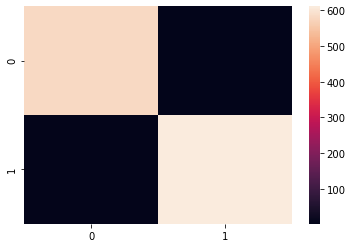

In [37]:
sns.heatmap(matrix)

# model Saving

In [39]:
import pickle
# persist maodel so that it can be used by different consumers
lrFile= open('LRModel.pckl','wb')
pickle.dump(pipe_lr_r13,lrFile)
lrFile.close()

# model Loading 

In [45]:
global lrLangDetectModel
lrLangDetectFile = open('LRModel.pckl', 'rb')
lrLangDetectModel = pickle.load(lrLangDetectFile)
lrLangDetectFile.close()

# method Defining to call trained Model and make predictions

In [52]:
def lang_detect(text):
    import numpy as np
    import string
    import re
    import pickle
    translate_table = dict((ord(char), None) for char in string.punctuation)
    
    global lrLangDetectModel
    lrLangDetectFile =open('LRModel.pckl', 'rb')
    lrLangDetectModel = pickle.load(lrLangDetectFile)
    lrLangDetectFile.close()
    
    text = " ".join(text.split())
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = text.translate(translate_table)
    pred = lrLangDetectModel.predict([text])
    prob = lrLangDetectModel.predict_proba([text])
    return pred[0]

In [53]:
 lang_detect("It is time to define the winners")

'English'

In [54]:
lang_detect("Libyscher Sieg")

'German'